<a href="https://colab.research.google.com/github/Javier024/colab/blob/main/parcial_Arbol_Decision_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Un modelo entrenado capaz de predecir si un producto es fruta o verdura basado en sus atributos.
teniendo en cuenta el dataset con columnas como:

Precio_por_kg

Tipo (Fruta/Verdura)

Origen (Nacional/Importado)

Estacionalidad (Alta/Baja)
1. Javier Guzman Macea
2. Angel Mendoza
3. Mario Arroyo




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = '/content/drive/MyDrive/AP colab/precios_frutas_verduras_colombia.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
ruta = '/content/drive/MyDrive/AP colab/precios_frutas_verduras_colombia.csv'
df = pd.read_csv(ruta)

df["Tipo"] = df["Tipo"].map({"Fruta": 0, "Verdura": 1})
df["Estacionalidad"] = df["Estacionalidad"].map({"Alta": 1, "Baja": 0})
df["Origen"] = df["Origen"].astype("category").cat.codes

X = df[["Precio_por_kg", "Origen", "Estacionalidad"]]
y = df["Tipo"]


In [3]:
from IPython.display import display

display(df)


,Producto,Tipo,Precio_por_kg,Origen,Estacionalidad
0,Banano,0,1800,7,1
1,Papa criolla,1,2500,4,1
2,Mango,0,3000,11,0
3,Tomate chonto,1,2800,2,1
4,Cebolla cabezona,1,2200,9,1
5,Piña,0,3500,8,0
6,Aguacate hass,0,6000,0,1
7,Yuca,1,1800,5,0
8,Fresa,0,5500,4,1
9,Zanahoria,1,2000,2,1


In [ ]:
df_tipo = pd.DataFrame(df["Tipo"])
df_tipo.groupby("Tipo")["Tipo"].count()




,Tipo
Tipo,
0,8
1,7


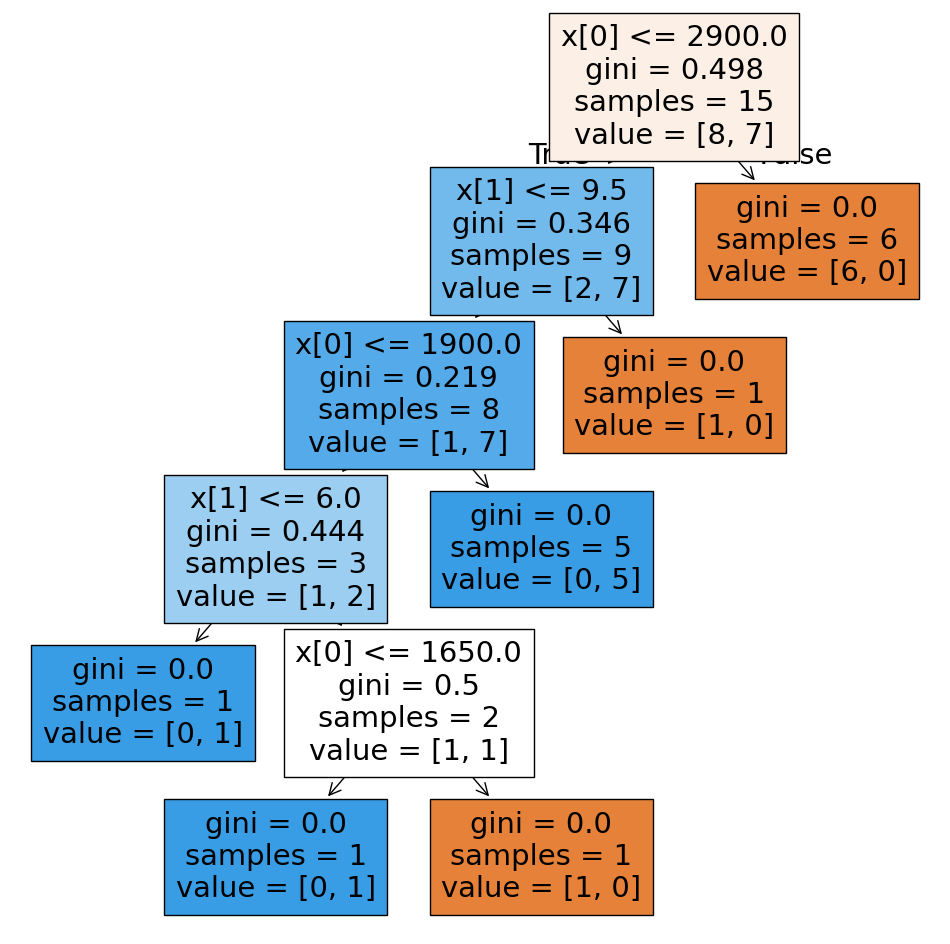

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

df = pd.read_csv('/content/drive/MyDrive/AP colab/precios_frutas_verduras_colombia.csv')
df["Tipo"] = df["Tipo"].map({"Fruta": 0, "Verdura": 1})
df["Estacionalidad"] = df["Estacionalidad"].map({"Alta": 1, "Baja": 0})
df["Origen"] = df["Origen"].astype("category").cat.codes

clf = DecisionTreeClassifier().fit(df[["Precio_por_kg", "Origen", "Estacionalidad"]], df["Tipo"])

plt.figure(figsize=(12,12))
plot_tree(clf, filled=True)
plt.show()


In [ ]:
frutas = pd.DataFrame(X)
frutas["Tipo"] = y
frutas.rename(columns={0: "Precio_por_kg", 1: "Origen", 2: "Estacionalidad"}, inplace=True)
frutas


,Precio_por_kg,Origen,Estacionalidad,Tipo
0,1800,7,1,0
1,2500,4,1,1
2,3000,11,0,0
3,2800,2,1,1
4,2200,9,1,1
5,3500,8,0,0
6,6000,0,1,0
7,1800,5,0,1
8,5500,4,1,0
9,2000,2,1,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(frutas, test_size=0.2, random_state=42)
train.shape


(12, 4)

In [ ]:
X_train = train[["Precio_por_kg", "Origen", "Estacionalidad"]]
y_train = train["Tipo"]

X_test = test[["Precio_por_kg", "Origen", "Estacionalidad"]]
y_test = test["Tipo"]


In [ ]:
X_test = test[["Precio_por_kg", "Origen", "Estacionalidad"]]
y_test = test["Tipo"]


In [ ]:
X_test = test[["Precio_por_kg", "Origen", "Estacionalidad"]]
y_test = test["Tipo"]


In [ ]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred


array([1, 1, 1])

In [ ]:
y_test.values


array([1, 1, 0])

In [ ]:
df_prediccion = pd.DataFrame(model.predict(X_test), columns=["Predicho"])
df_prediccion["Real"] = y_test.values
df_prediccion


,Predicho,Real
0,1,1
1,1,1
2,1,0


In [ ]:
model.score(X_test, y_test)


0.6666666666666666

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[0, 1],
       [0, 2]])

In [ ]:
X_train.head(2)


,Precio_por_kg,Origen,Estacionalidad
13,2200,1,0
5,3500,8,0


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
